# naive bayes theorem


#import library


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#Load Iris

In [57]:
iris=load_iris()

In [58]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [59]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [60]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [62]:
df['species']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [63]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [64]:
df['species']=pd.Categorical.from_codes(iris.target,iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#checking Null

In [65]:
df.isnull().any()

,0
sepal length (cm),False
sepal width (cm),False
petal length (cm),False
petal width (cm),False
species,False


#Checking Normal Distribution

In [66]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<ipython-input-67-98f7b37ae1a1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


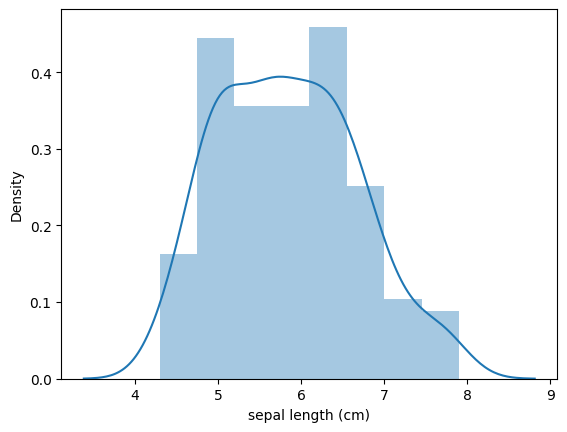

<ipython-input-67-98f7b37ae1a1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


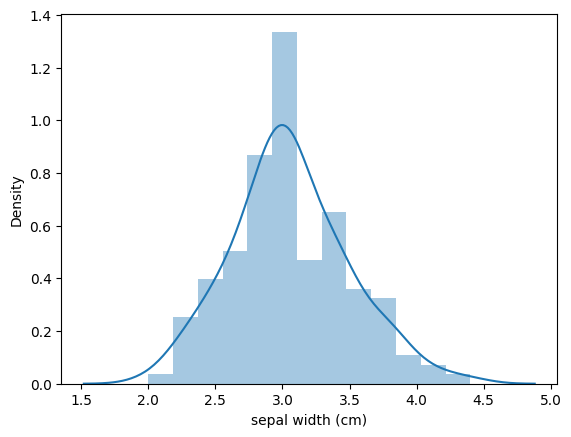

<ipython-input-67-98f7b37ae1a1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


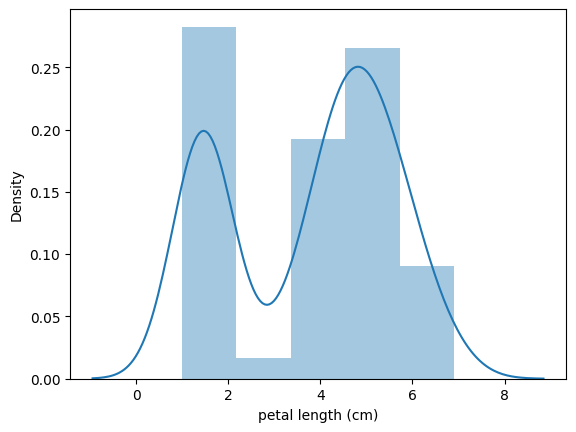

<ipython-input-67-98f7b37ae1a1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


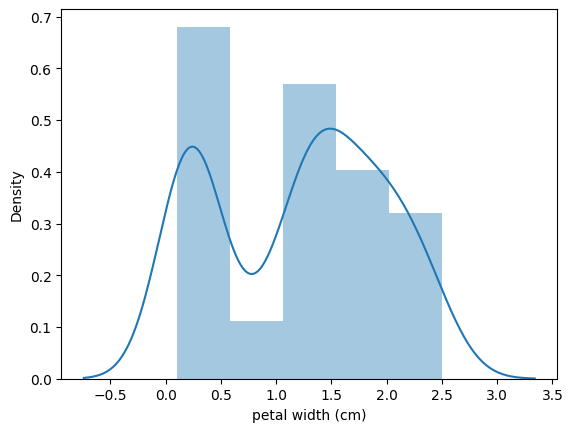

In [67]:
for column in df.columns:
    if column!='species':
        sns.distplot(df[column])
        plt.show()

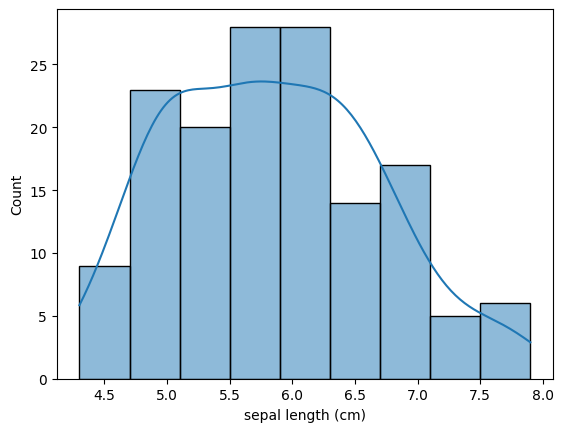

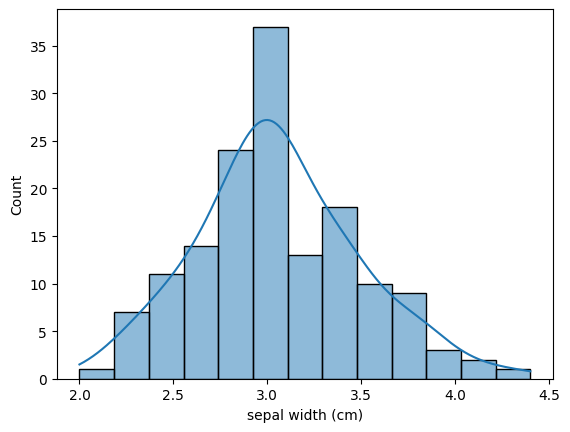

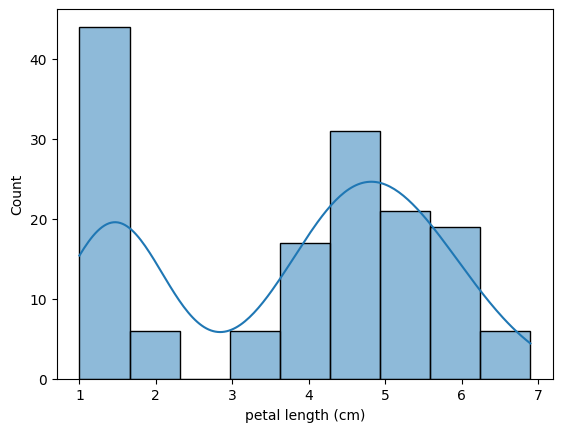

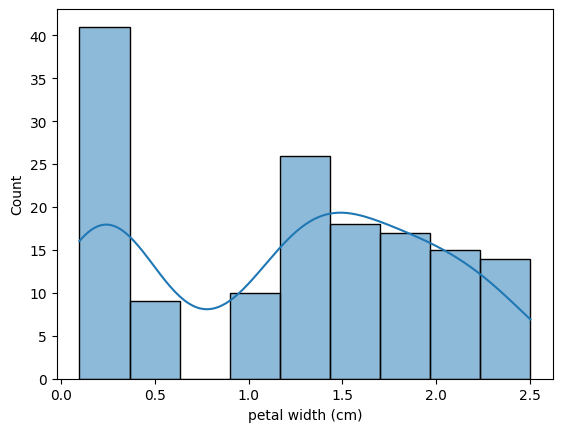

In [68]:
for column in df.columns[:-1]:
    sns.histplot(df[column],kde=True)
    plt.show()

#checking Outliers

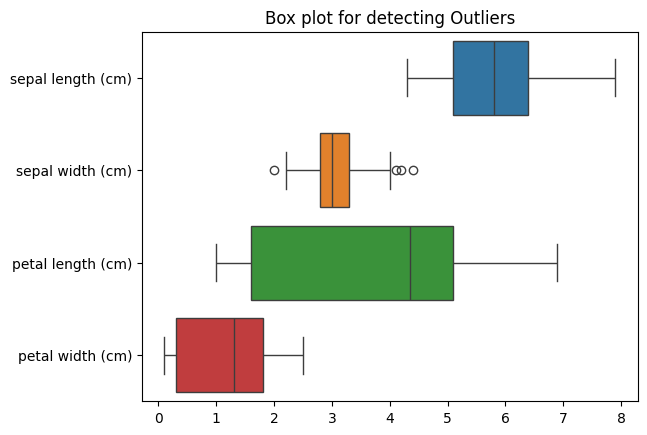

In [69]:
sns.boxplot(data=df,orient='h')
#sns.boxplot(data=df)
plt.title("Box plot for detecting Outliers")
plt.show()

#deleting Outliers

In [70]:
column='sepal length (cm)'
Q1=df[column].quantile(0.25)
Q3=df[column].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]

#Split data

In [71]:
feature_columns=iris.feature_names
#x=df[feature_columns]
#y=df['species']
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_test,y_train,y_test=train_test_split(df[feature_columns],df['species'],test_size=0.2,random_state=42)

#scaling

In [72]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

#Gaussian neive Bayes

Train Model

In [73]:
model=GaussianNB()
model.fit(x_train_scaled,y_train)

GaussianNB()

#test model

In [75]:
y_pred=model.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)
print("Classification Report:\n"+(classification_report(y_test,y_pred)))


Accuracy: 1.0
confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          0
virginica        0           0         11


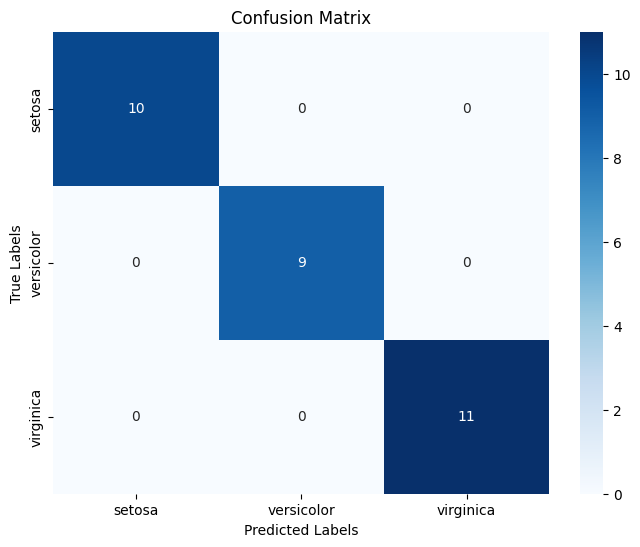

In [76]:
cm_df=pd.DataFrame(cm,index=iris.target_names,columns=iris.target_names)
print("Confusion Matrix:")
print(cm_df)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Bernoulli  Neive Bayes Train Model

In [79]:
#import numpy as np
#rng = np.random.RandomState(1)
#X = rng.randint(5, size=(6, 100))
#Y = np.array([1, 2, 3, 4, 4, 5])
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x_train_scaled,y_train)
print(clf.predict(x_train_scaled[2:3]))

['virginica']


In [80]:
y_pred=clf.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)
print("Classification Report:\n"+(classification_report(y_test,y_pred)))

Accuracy: 0.8333333333333334
confusion matrix:
 [[10  0  0]
 [ 0  4  5]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.44      0.62         9
   virginica       0.69      1.00      0.81        11

    accuracy                           0.83        30
   macro avg       0.90      0.81      0.81        30
weighted avg       0.89      0.83      0.82        30



Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           4          5
virginica        0           0         11


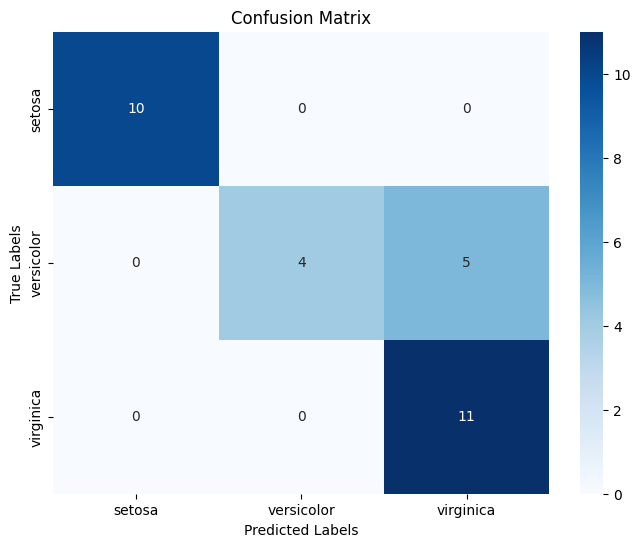

In [81]:
cm_df=pd.DataFrame(cm,index=iris.target_names,columns=iris.target_names)
print("Confusion Matrix:")
print(cm_df)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Multinomial Neive Bayes

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [85]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train_scaled,y_train)

MultinomialNB()

In [86]:
y_pred=clf.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cm)
print("Classification Report:\n"+(classification_report(y_test,y_pred)))

Accuracy: 0.6333333333333333
confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.45      1.00      0.62         9
   virginica       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          0
virginica        0          11          0


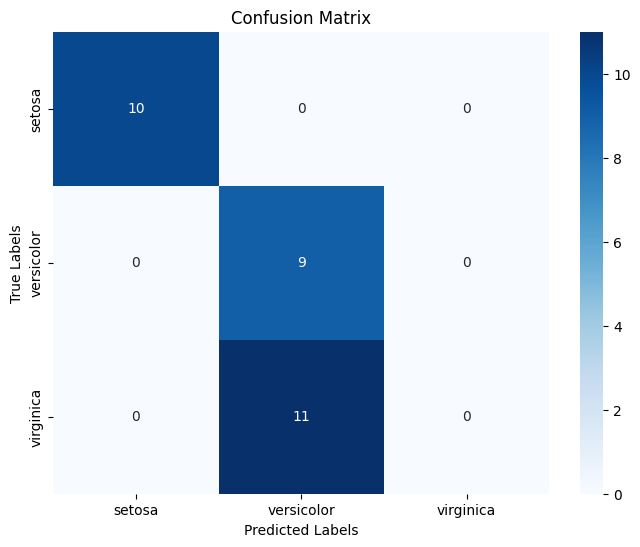

In [87]:
cm_df=pd.DataFrame(cm,index=iris.target_names,columns=iris.target_names)
print("Confusion Matrix:")
print(cm_df)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()